In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import funciones_MBA as fMBA
import seaborn as sns

### Gráficos premio total 1000

In [3]:
#Parámetros
n_neu = 100
pasos = 700
peso_inicial = 10
peso_total = 1000

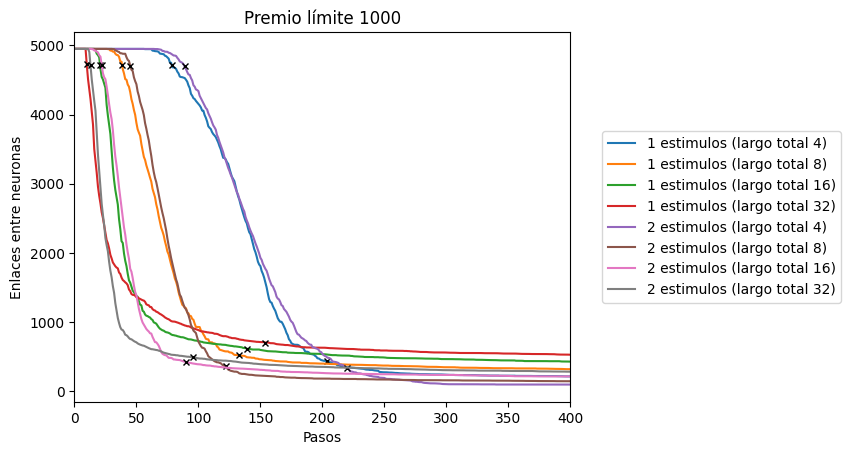

In [4]:
dicc_tau_medio={}
dicc_tau_95 = {}
dicc_tau_05 = {}
lista_grados = []

#Gráfico para distintos estimulos
for cantidad_estim in [1, 2]:
    for largo_estim in [4, 8, 16, 32]:
        nucleo, coclea = fMBA.iniciar_red(n_neu, peso_inicial)
        lista_vertices = fMBA.entrenar_peso_limite(nucleo, coclea, largo_estim, cantidad_estim, pasos, peso_total)

        dicc_tau_95[(cantidad_estim, largo_estim)] = fMBA.x_tau_porcentaje(lista_vertices, 95)[0]
        dicc_tau_05[(cantidad_estim, largo_estim)] = fMBA.x_tau_porcentaje(lista_vertices, 5)[0]
        dicc_tau_medio[(cantidad_estim, largo_estim)] = fMBA.x_tau_medio(lista_vertices)[0]

        lista_grados.append(list(dict(nucleo.degree()).values()))
        plt.plot(lista_vertices, label=f'{cantidad_estim} estimulos (largo total {largo_estim})')
        plt.plot(dicc_tau_95[(cantidad_estim, largo_estim)], fMBA.x_tau_porcentaje(lista_vertices, 95)[1], marker='x', markersize=4, color='black')
        plt.plot(dicc_tau_05[(cantidad_estim, largo_estim)], fMBA.x_tau_porcentaje(lista_vertices, 5)[1], marker='x', markersize=4, color='black')

        plt.xlim(0, 400) #lo acorté visualmente para poder diferenciar mejor algunas cosas pero la cantidad de pasos no cambia
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.xlabel ("Pasos")
plt.ylabel("Enlaces entre neuronas")
plt.title ("Premio límite 1000")
plt.show()

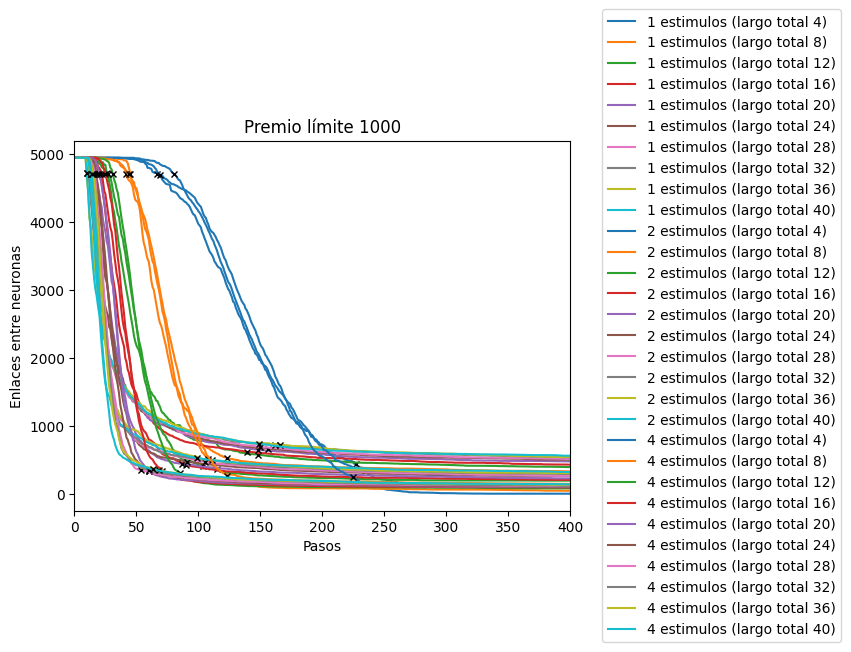

In [5]:
dicc_tau_medio={}
dicc_tau_95 = {}
dicc_tau_05 = {}
lista_grados = []

#Gráfico para distintos estimulos
for cantidad_estim in [1, 2, 4]:
    for largo_estim in [4, 8, 12, 16, 20, 24, 28, 32, 36, 40]:
        nucleo, coclea = fMBA.iniciar_red(n_neu, peso_inicial)
        lista_vertices = fMBA.entrenar_peso_limite(nucleo, coclea, largo_estim, cantidad_estim, pasos, peso_total)

        dicc_tau_95[(cantidad_estim, largo_estim)] = fMBA.x_tau_porcentaje(lista_vertices, 95)[0]
        dicc_tau_05[(cantidad_estim, largo_estim)] = fMBA.x_tau_porcentaje(lista_vertices, 5)[0]
        dicc_tau_medio[(cantidad_estim, largo_estim)] = fMBA.x_tau_medio(lista_vertices)[0]

        lista_grados.append(list(dict(nucleo.degree()).values()))
        plt.plot(lista_vertices, label=f'{cantidad_estim} estimulos (largo total {largo_estim})')
        plt.plot(dicc_tau_95[(cantidad_estim, largo_estim)], fMBA.x_tau_porcentaje(lista_vertices, 95)[1], marker='x', markersize=4, color='black')
        plt.plot(dicc_tau_05[(cantidad_estim, largo_estim)], fMBA.x_tau_porcentaje(lista_vertices, 5)[1], marker='x', markersize=4, color='black')

        plt.xlim(0, 400) #lo acorté visualmente para poder diferenciar mejor algunas cosas pero la cantidad de pasos no cambia
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.xlabel ("Pasos")
plt.ylabel("Enlaces entre neuronas")
plt.title ("Premio límite 1000")
plt.show()

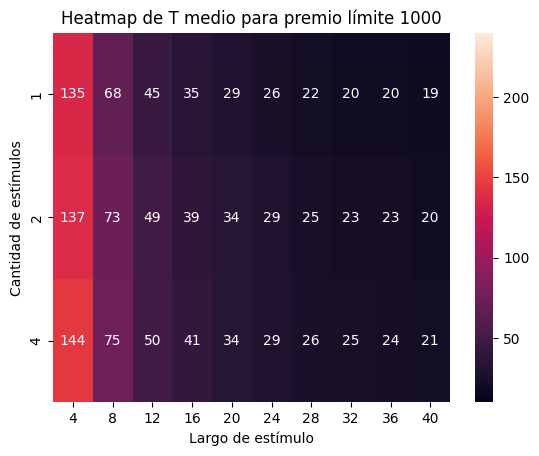

In [6]:
# Crear un DataFrame a partir del diccionario tau medio
df_hm = pd.DataFrame.from_dict(dicc_tau_medio, orient='index', columns=['Value'])
df_hm.index = pd.MultiIndex.from_tuples(df_hm.index, names=["Row", "Column"])
df_hm = df_hm.unstack(level='Column')

# Visualizar el DataFrame resultante
df_hm.columns = df_hm.columns.droplevel(0)  # Eliminar niveles innecesarios
df_hm = df_hm.rename_axis(index=None, columns=None)  # Eliminar nombres de los ejes

df_hm

hm = sns.heatmap(df_hm, annot=True, fmt="g", vmax= 240, vmin=10)
hm.set(xlabel='Largo de estímulo', ylabel='Cantidad de estímulos', title = "Heatmap de T medio para premio límite 1000")
plt.show()

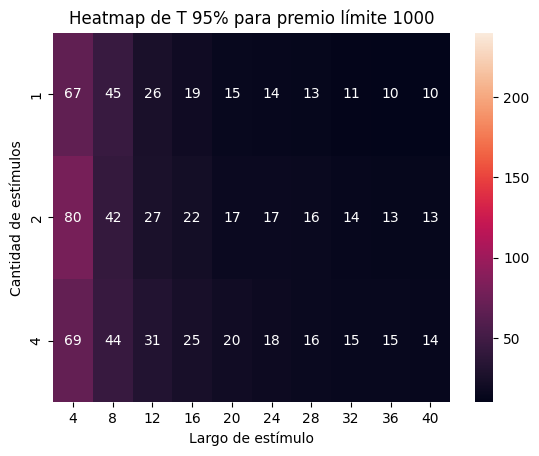

In [7]:
# Crear un DataFrame a partir del diccionario tau 95
df_hm = pd.DataFrame.from_dict(dicc_tau_95, orient='index', columns=['Value'])
df_hm.index = pd.MultiIndex.from_tuples(df_hm.index, names=["Row", "Column"])
df_hm = df_hm.unstack(level='Column')

# Visualizar el DataFrame resultante
df_hm.columns = df_hm.columns.droplevel(0)  # Eliminar niveles innecesarios
df_hm = df_hm.rename_axis(index=None, columns=None)  # Eliminar nombres de los ejes

df_hm

hm = sns.heatmap(df_hm, annot=True, fmt="g", vmax= 240, vmin=10)
hm.set(xlabel='Largo de estímulo', ylabel='Cantidad de estímulos', title = "Heatmap de T 95% para premio límite 1000")
plt.show()


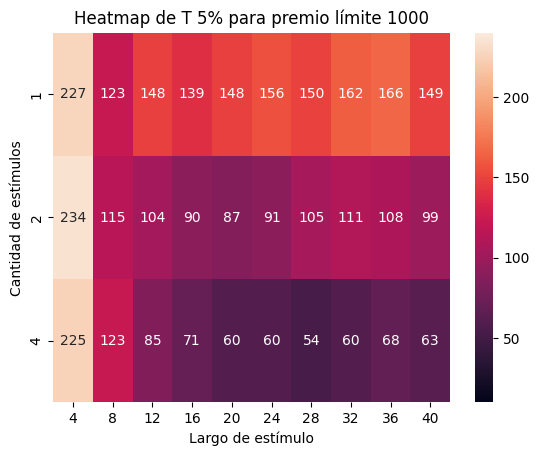

In [8]:
# Crear un DataFrame a partir del diccionario tau 05
df_hm = pd.DataFrame.from_dict(dicc_tau_05, orient='index', columns=['Value'])
df_hm.index = pd.MultiIndex.from_tuples(df_hm.index, names=["Row", "Column"])
df_hm = df_hm.unstack(level='Column')

# Visualizar el DataFrame resultante
df_hm.columns = df_hm.columns.droplevel(0)  # Eliminar niveles innecesarios
df_hm = df_hm.rename_axis(index=None, columns=None)  # Eliminar nombres de los ejes

df_hm

hm = sns.heatmap(df_hm, annot=True, fmt="g", vmax= 240, vmin=10)
hm.set(xlabel='Largo de estímulo', ylabel='Cantidad de estímulos', title = "Heatmap de T 5% para premio límite 1000")
plt.show()


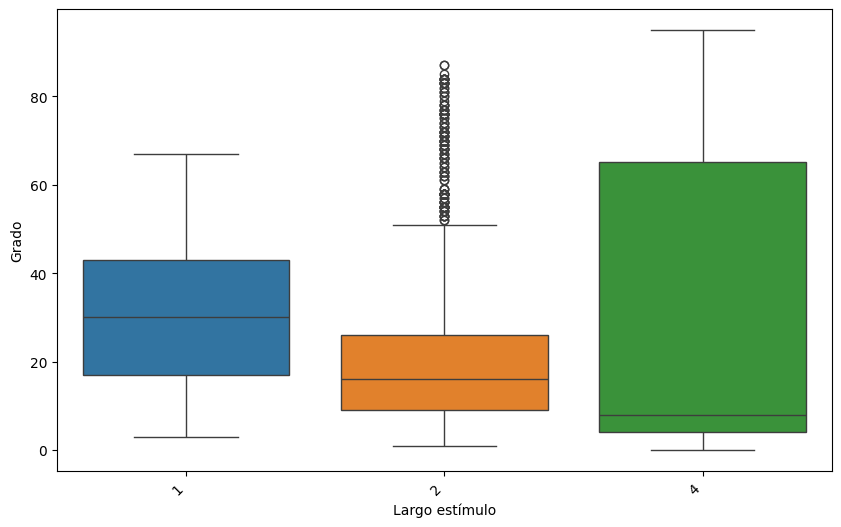

In [38]:
#Boxplot

plt.figure(figsize=(10, 6))
df_bp = pd.DataFrame(data=list(zip(*lista_grados)), columns=dicc_tau_medio.keys())
#boxplot without outliers
sns.boxplot(data=df_bp)
plt.xlabel('Largo estímulo')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Grado')
plt.show()

Text(0.5, 1.0, 'Boxplot premio límite 1000')

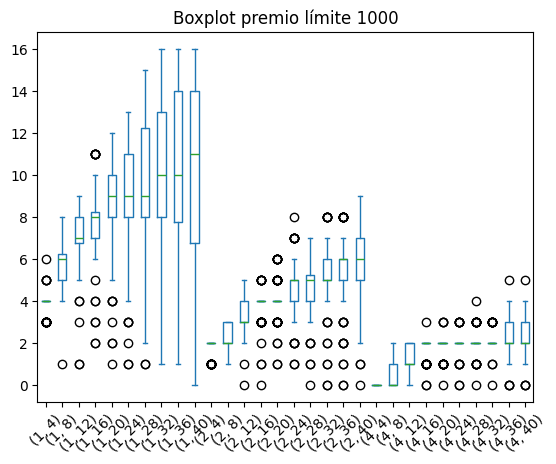

In [9]:
df_bp = pd.DataFrame(data=list(zip(*lista_grados)), columns=dicc_tau_medio.keys())
df_bp.plot.box(rot=45)
plt.title ("Boxplot premio límite 1000")

### Gráficos premio límite 100

In [10]:
#Parámetros
n_neu = 100
pasos = 700
peso_inicial = 10
peso_total = 100

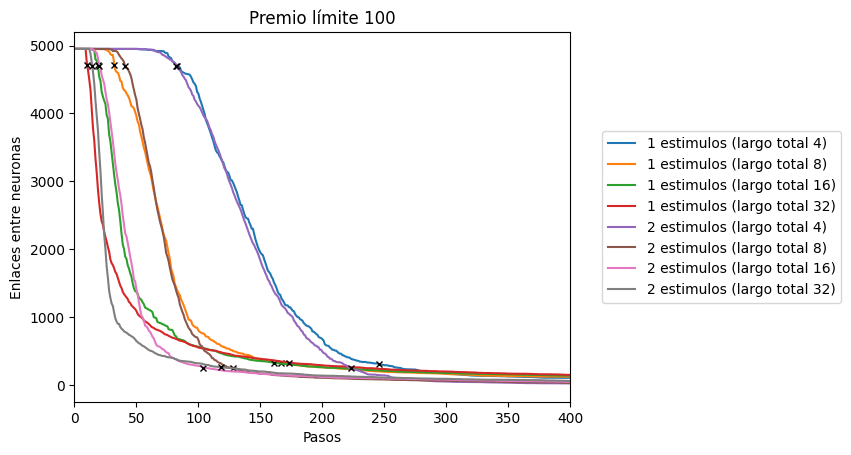

In [11]:
dicc_tau_medio={}
dicc_tau_95 = {}
dicc_tau_05 = {}
lista_grados = []

#Gráfico para distintos estimulos
for cantidad_estim in [1, 2]:
    for largo_estim in [4, 8, 16, 32]:
        nucleo, coclea = fMBA.iniciar_red(n_neu, peso_inicial)
        lista_vertices = fMBA.entrenar_peso_limite(nucleo, coclea, largo_estim, cantidad_estim, pasos, peso_total)

        dicc_tau_95[(cantidad_estim, largo_estim)] = fMBA.x_tau_porcentaje(lista_vertices, 95)[0]
        dicc_tau_05[(cantidad_estim, largo_estim)] = fMBA.x_tau_porcentaje(lista_vertices, 5)[0]
        dicc_tau_medio[(cantidad_estim, largo_estim)] = fMBA.x_tau_medio(lista_vertices)[0]

        lista_grados.append(list(dict(nucleo.degree()).values()))
        plt.plot(lista_vertices, label=f'{cantidad_estim} estimulos (largo total {largo_estim})')
        plt.plot(dicc_tau_95[(cantidad_estim, largo_estim)], fMBA.x_tau_porcentaje(lista_vertices, 95)[1], marker='x', markersize=4, color='black')
        plt.plot(dicc_tau_05[(cantidad_estim, largo_estim)], fMBA.x_tau_porcentaje(lista_vertices, 5)[1], marker='x', markersize=4, color='black')

        plt.xlim(0, 400) #lo acorté visualmente para poder diferenciar mejor algunas cosas pero la cantidad de pasos no cambia
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.xlabel ("Pasos")
plt.ylabel("Enlaces entre neuronas")
plt.title ("Premio límite 100")
plt.show()

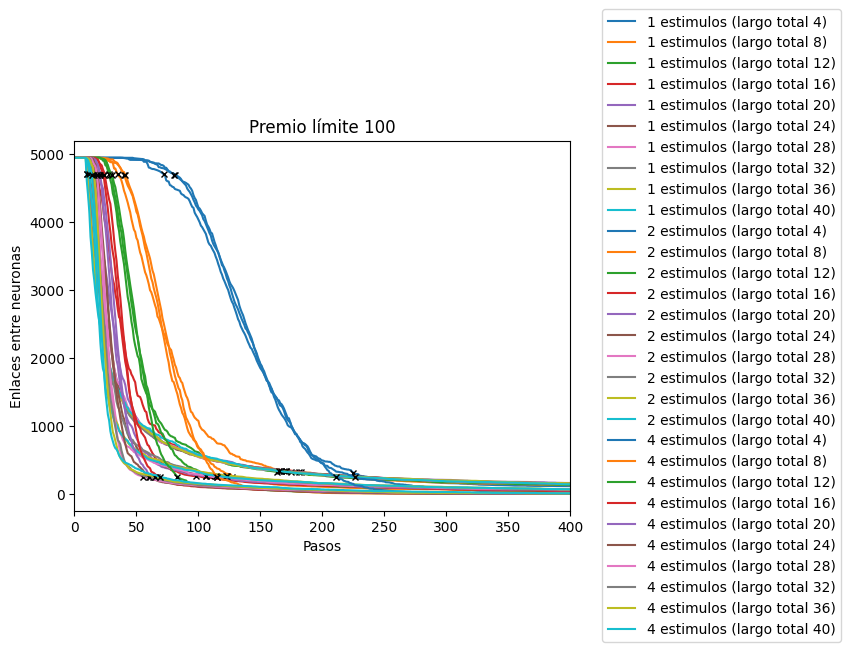

In [12]:
dicc_tau_medio={}
dicc_tau_95 = {}
dicc_tau_05 = {}
lista_grados = []

#Gráfico para distintos estimulos
for cantidad_estim in [1, 2, 4]:
    for largo_estim in [4, 8, 12, 16, 20, 24, 28, 32, 36, 40]:
        nucleo, coclea = fMBA.iniciar_red(n_neu, peso_inicial)
        lista_vertices = fMBA.entrenar_peso_limite(nucleo, coclea, largo_estim, cantidad_estim, pasos, peso_total)

        dicc_tau_95[(cantidad_estim, largo_estim)] = fMBA.x_tau_porcentaje(lista_vertices, 95)[0]
        dicc_tau_05[(cantidad_estim, largo_estim)] = fMBA.x_tau_porcentaje(lista_vertices, 5)[0]
        dicc_tau_medio[(cantidad_estim, largo_estim)] = fMBA.x_tau_medio(lista_vertices)[0]

        lista_grados.append(list(dict(nucleo.degree()).values()))
        plt.plot(lista_vertices, label=f'{cantidad_estim} estimulos (largo total {largo_estim})')
        plt.plot(dicc_tau_95[(cantidad_estim, largo_estim)], fMBA.x_tau_porcentaje(lista_vertices, 95)[1], marker='x', markersize=4, color='black')
        plt.plot(dicc_tau_05[(cantidad_estim, largo_estim)], fMBA.x_tau_porcentaje(lista_vertices, 5)[1], marker='x', markersize=4, color='black')

        plt.xlim(0, 400) #lo acorté visualmente para poder diferenciar mejor algunas cosas pero la cantidad de pasos no cambia
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.xlabel ("Pasos")
plt.ylabel("Enlaces entre neuronas")
plt.title ("Premio límite 100")
plt.show()

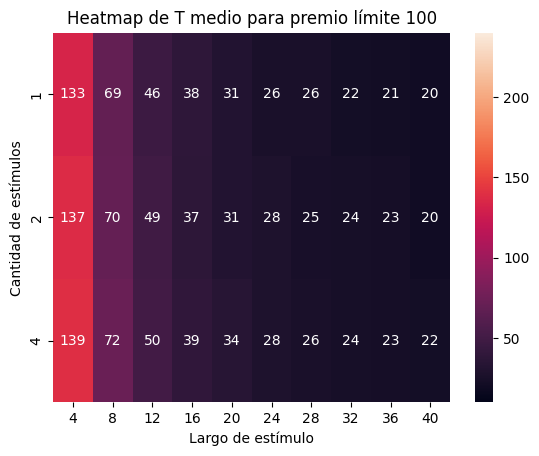

In [13]:
# Crear un DataFrame a partir del diccionario tau medio
df_hm = pd.DataFrame.from_dict(dicc_tau_medio, orient='index', columns=['Value'])
df_hm.index = pd.MultiIndex.from_tuples(df_hm.index, names=["Row", "Column"])
df_hm = df_hm.unstack(level='Column')

# Visualizar el DataFrame resultante
df_hm.columns = df_hm.columns.droplevel(0)  # Eliminar niveles innecesarios
df_hm = df_hm.rename_axis(index=None, columns=None)  # Eliminar nombres de los ejes

df_hm

hm = sns.heatmap(df_hm, annot=True, fmt="g", vmax= 240, vmin=10)
hm.set(xlabel='Largo de estímulo', ylabel='Cantidad de estímulos', title = "Heatmap de T medio para premio límite 100")
plt.show()

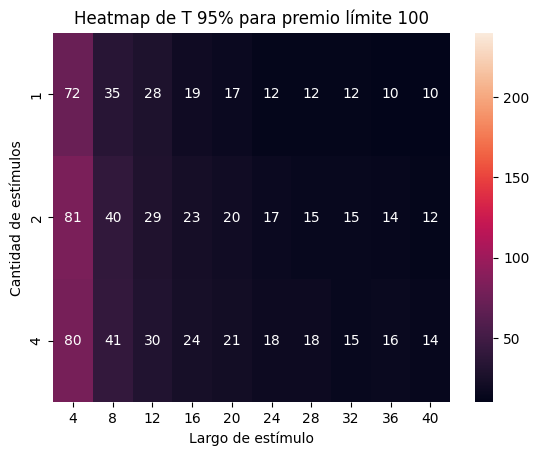

In [14]:
# Crear un DataFrame a partir del diccionario tau 95
df_hm = pd.DataFrame.from_dict(dicc_tau_95, orient='index', columns=['Value'])
df_hm.index = pd.MultiIndex.from_tuples(df_hm.index, names=["Row", "Column"])
df_hm = df_hm.unstack(level='Column')

# Visualizar el DataFrame resultante
df_hm.columns = df_hm.columns.droplevel(0)  # Eliminar niveles innecesarios
df_hm = df_hm.rename_axis(index=None, columns=None)  # Eliminar nombres de los ejes

df_hm

hm = sns.heatmap(df_hm, annot=True, fmt="g", vmax= 240, vmin=10)
hm.set(xlabel='Largo de estímulo', ylabel='Cantidad de estímulos', title = "Heatmap de T 95% para premio límite 100")
plt.show()


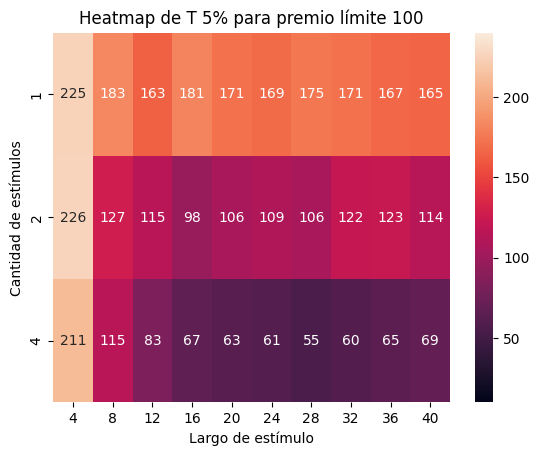

In [15]:
# Crear un DataFrame a partir del diccionario tau 05
df_hm = pd.DataFrame.from_dict(dicc_tau_05, orient='index', columns=['Value'])
df_hm.index = pd.MultiIndex.from_tuples(df_hm.index, names=["Row", "Column"])
df_hm = df_hm.unstack(level='Column')

# Visualizar el DataFrame resultante
df_hm.columns = df_hm.columns.droplevel(0)  # Eliminar niveles innecesarios
df_hm = df_hm.rename_axis(index=None, columns=None)  # Eliminar nombres de los ejes

df_hm

hm = sns.heatmap(df_hm, annot=True, fmt="g", vmax= 240, vmin=10)
hm.set(xlabel='Largo de estímulo', ylabel='Cantidad de estímulos', title = "Heatmap de T 5% para premio límite 100")
plt.show()

In [ ]:
#Boxplot

plt.figure(figsize=(10, 6))
df_bp = pd.DataFrame(data=list(zip(*lista_grados)), columns=dicc_tau_medio.keys())
#boxplot without outliers
sns.boxplot(data=df_bp)
plt.xlabel('Largo estímulo')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Grado')
plt.show()

Text(0.5, 1.0, 'Boxplot premio límite 100')

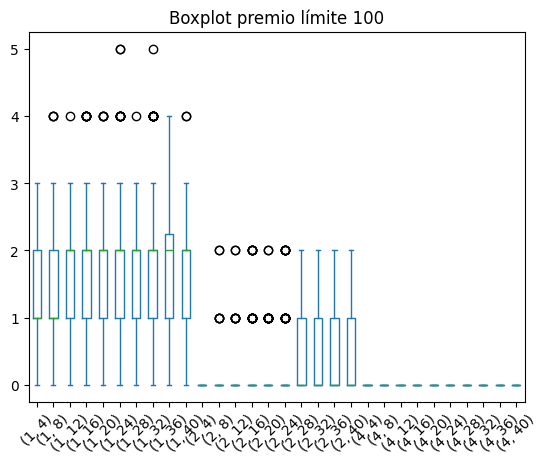

In [16]:
df_bp = pd.DataFrame(data=list(zip(*lista_grados)), columns=dicc_tau_medio.keys())
df_bp.plot.box(rot=45)
plt.title ("Boxplot premio límite 100")

### Gráficos premio límite 1000, resto límite 500

In [17]:
#Parámetros
n_neu = 100
pasos = 700
peso_inicial = 10
peso_total = 1000
resto_total = 500

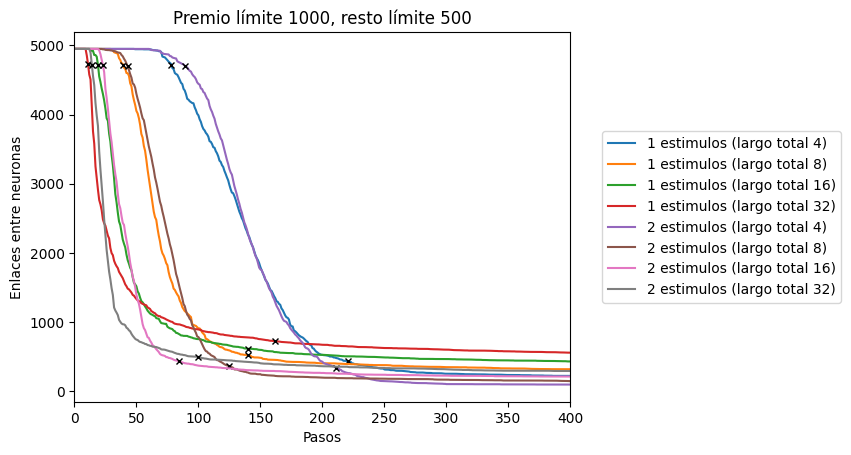

In [18]:
dicc_tau_medio={}
dicc_tau_95 = {}
dicc_tau_05 = {}
lista_grados = []

#Gráfico para distintos estimulos
for cantidad_estim in [1, 2]:
    for largo_estim in [4, 8, 16, 32]:
        nucleo, coclea = fMBA.iniciar_red(n_neu, peso_inicial)
        lista_vertices = fMBA.entrenar_peso_limite(nucleo, coclea, largo_estim, cantidad_estim, pasos, peso_total)

        dicc_tau_95[(cantidad_estim, largo_estim)] = fMBA.x_tau_porcentaje(lista_vertices, 95)[0]
        dicc_tau_05[(cantidad_estim, largo_estim)] = fMBA.x_tau_porcentaje(lista_vertices, 5)[0]
        dicc_tau_medio[(cantidad_estim, largo_estim)] = fMBA.x_tau_medio(lista_vertices)[0]

        lista_grados.append(list(dict(nucleo.degree()).values()))
        plt.plot(lista_vertices, label=f'{cantidad_estim} estimulos (largo total {largo_estim})')
        plt.plot(dicc_tau_95[(cantidad_estim, largo_estim)], fMBA.x_tau_porcentaje(lista_vertices, 95)[1], marker='x', markersize=4, color='black')
        plt.plot(dicc_tau_05[(cantidad_estim, largo_estim)], fMBA.x_tau_porcentaje(lista_vertices, 5)[1], marker='x', markersize=4, color='black')

        plt.xlim(0, 400) #lo acorté visualmente para poder diferenciar mejor algunas cosas pero la cantidad de pasos no cambia
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.xlabel ("Pasos")
plt.ylabel("Enlaces entre neuronas")
plt.title ("Premio límite 1000, resto límite 500")
plt.show()

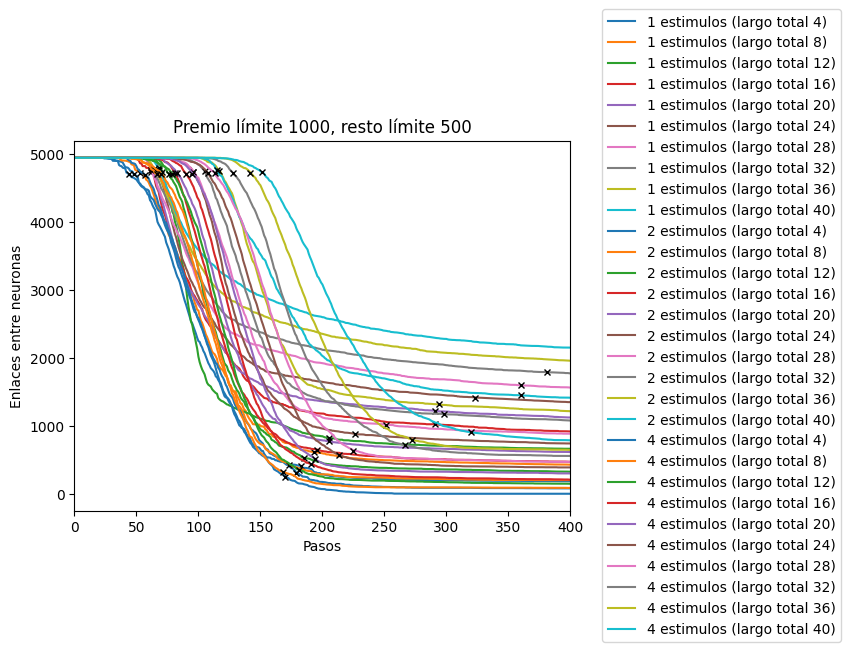

In [19]:
dicc_tau_medio={}
dicc_tau_95 = {}
dicc_tau_05 = {}
lista_grados = []

#Gráfico para distintos estimulos
for cantidad_estim in [1, 2, 4]:
    for largo_estim in [4, 8, 12, 16, 20, 24, 28, 32, 36, 40]:
        nucleo, coclea = fMBA.iniciar_red(n_neu, peso_inicial)
        lista_vertices = fMBA.entrenar_peso_limite_resto(nucleo, coclea, largo_estim, cantidad_estim, pasos, peso_total, resto_total)

        dicc_tau_95[(cantidad_estim, largo_estim)] = fMBA.x_tau_porcentaje(lista_vertices, 95)[0]
        dicc_tau_05[(cantidad_estim, largo_estim)] = fMBA.x_tau_porcentaje(lista_vertices, 5)[0]
        dicc_tau_medio[(cantidad_estim, largo_estim)] = fMBA.x_tau_medio(lista_vertices)[0]

        lista_grados.append(list(dict(nucleo.degree()).values()))
        plt.plot(lista_vertices, label=f'{cantidad_estim} estimulos (largo total {largo_estim})')
        plt.plot(dicc_tau_95[(cantidad_estim, largo_estim)], fMBA.x_tau_porcentaje(lista_vertices, 95)[1], marker='x', markersize=4, color='black')
        plt.plot(dicc_tau_05[(cantidad_estim, largo_estim)], fMBA.x_tau_porcentaje(lista_vertices, 5)[1], marker='x', markersize=4, color='black')

        plt.xlim(0, 400) #lo acorté visualmente para poder diferenciar mejor algunas cosas pero la cantidad de pasos no cambia
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.xlabel ("Pasos")
plt.ylabel("Enlaces entre neuronas")
plt.title ("Premio límite 1000, resto límite 500")
plt.show()

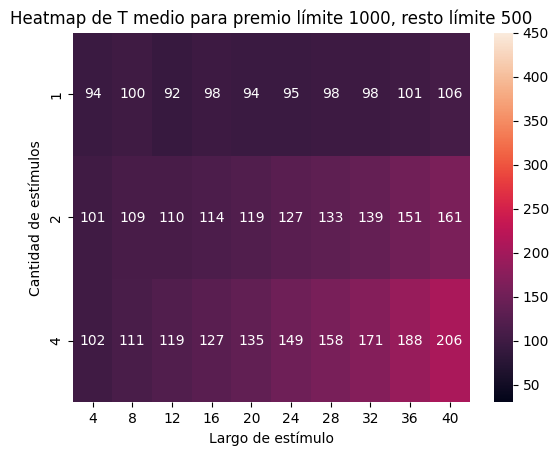

In [20]:
# Crear un DataFrame a partir del diccionario tau medio
df_hm = pd.DataFrame.from_dict(dicc_tau_medio, orient='index', columns=['Value'])
df_hm.index = pd.MultiIndex.from_tuples(df_hm.index, names=["Row", "Column"])
df_hm = df_hm.unstack(level='Column')

# Visualizar el DataFrame resultante
df_hm.columns = df_hm.columns.droplevel(0)  # Eliminar niveles innecesarios
df_hm = df_hm.rename_axis(index=None, columns=None)  # Eliminar nombres de los ejes

df_hm

hm = sns.heatmap(df_hm, annot=True, fmt="g", vmax= 450, vmin=30)
hm.set(xlabel='Largo de estímulo', ylabel='Cantidad de estímulos', title = "Heatmap de T medio para premio límite 1000, resto límite 500")
plt.show()

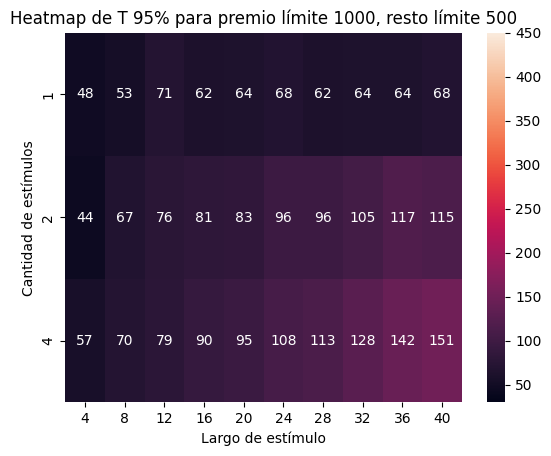

In [21]:
# Crear un DataFrame a partir del diccionario tau 95
df_hm = pd.DataFrame.from_dict(dicc_tau_95, orient='index', columns=['Value'])
df_hm.index = pd.MultiIndex.from_tuples(df_hm.index, names=["Row", "Column"])
df_hm = df_hm.unstack(level='Column')

# Visualizar el DataFrame resultante
df_hm.columns = df_hm.columns.droplevel(0)  # Eliminar niveles innecesarios
df_hm = df_hm.rename_axis(index=None, columns=None)  # Eliminar nombres de los ejes

df_hm

hm = sns.heatmap(df_hm, annot=True, fmt="g", vmax= 450, vmin=30)
hm.set(xlabel='Largo de estímulo', ylabel='Cantidad de estímulos', title = "Heatmap de T 95% para premio límite 1000, resto límite 500")
plt.show()


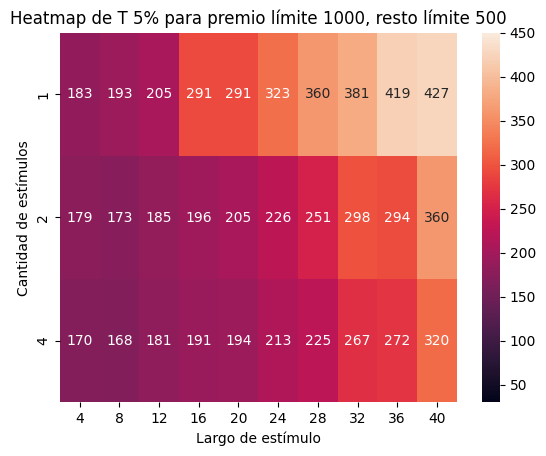

In [22]:
# Crear un DataFrame a partir del diccionario tau 05
df_hm = pd.DataFrame.from_dict(dicc_tau_05, orient='index', columns=['Value'])
df_hm.index = pd.MultiIndex.from_tuples(df_hm.index, names=["Row", "Column"])
df_hm = df_hm.unstack(level='Column')

# Visualizar el DataFrame resultante
df_hm.columns = df_hm.columns.droplevel(0)  # Eliminar niveles innecesarios
df_hm = df_hm.rename_axis(index=None, columns=None)  # Eliminar nombres de los ejes

df_hm

hm = sns.heatmap(df_hm, annot=True, fmt="g", vmax= 450, vmin=30)
hm.set(xlabel='Largo de estímulo', ylabel='Cantidad de estímulos', title = "Heatmap de T 5% para premio límite 1000, resto límite 500")
plt.show()

In [ ]:
#Boxplot

plt.figure(figsize=(10, 6))
df_bp = pd.DataFrame(data=list(zip(*lista_grados)), columns=dicc_tau_medio.keys())
#boxplot without outliers
sns.boxplot(data=df_bp)
plt.xlabel('Largo estímulo')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Grado')
plt.show()

Text(0.5, 1.0, 'Boxplot premio límite 1000, resto límite 500')

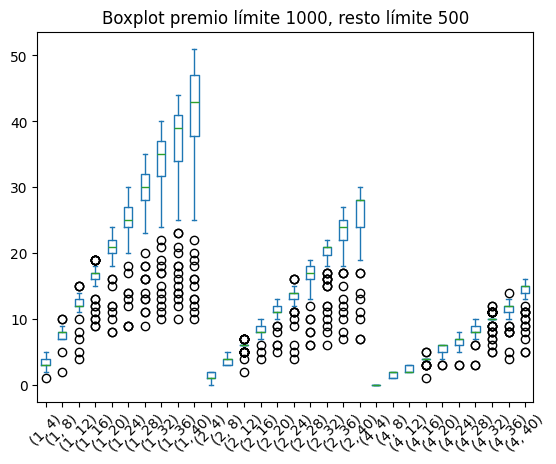

In [23]:
df_bp = pd.DataFrame(data=list(zip(*lista_grados)), columns=dicc_tau_medio.keys())
df_bp.plot.box(rot=45)
plt.title ("Boxplot premio límite 1000, resto límite 500")

### Gráficos premio límite 1000, resto límite 1000

In [24]:
#Parámetros
n_neu = 100
pasos = 700
peso_inicial = 10
peso_total = 1000
resto_total = 1000

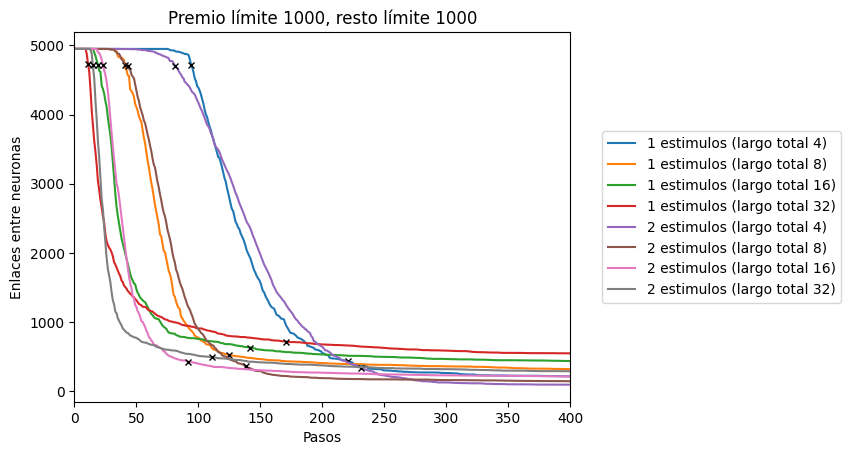

In [25]:
dicc_tau_medio={}
dicc_tau_95 = {}
dicc_tau_05 = {}
lista_grados = []

#Gráfico para distintos estimulos
for cantidad_estim in [1, 2]:
    for largo_estim in [4, 8, 16, 32]:
        nucleo, coclea = fMBA.iniciar_red(n_neu, peso_inicial)
        lista_vertices = fMBA.entrenar_peso_limite(nucleo, coclea, largo_estim, cantidad_estim, pasos, peso_total)

        dicc_tau_95[(cantidad_estim, largo_estim)] = fMBA.x_tau_porcentaje(lista_vertices, 95)[0]
        dicc_tau_05[(cantidad_estim, largo_estim)] = fMBA.x_tau_porcentaje(lista_vertices, 5)[0]
        dicc_tau_medio[(cantidad_estim, largo_estim)] = fMBA.x_tau_medio(lista_vertices)[0]

        lista_grados.append(list(dict(nucleo.degree()).values()))
        plt.plot(lista_vertices, label=f'{cantidad_estim} estimulos (largo total {largo_estim})')
        plt.plot(dicc_tau_95[(cantidad_estim, largo_estim)], fMBA.x_tau_porcentaje(lista_vertices, 95)[1], marker='x', markersize=4, color='black')
        plt.plot(dicc_tau_05[(cantidad_estim, largo_estim)], fMBA.x_tau_porcentaje(lista_vertices, 5)[1], marker='x', markersize=4, color='black')

        plt.xlim(0, 400) #lo acorté visualmente para poder diferenciar mejor algunas cosas pero la cantidad de pasos no cambia
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.xlabel ("Pasos")
plt.ylabel("Enlaces entre neuronas")
plt.title ("Premio límite 1000, resto límite 1000")
plt.show()

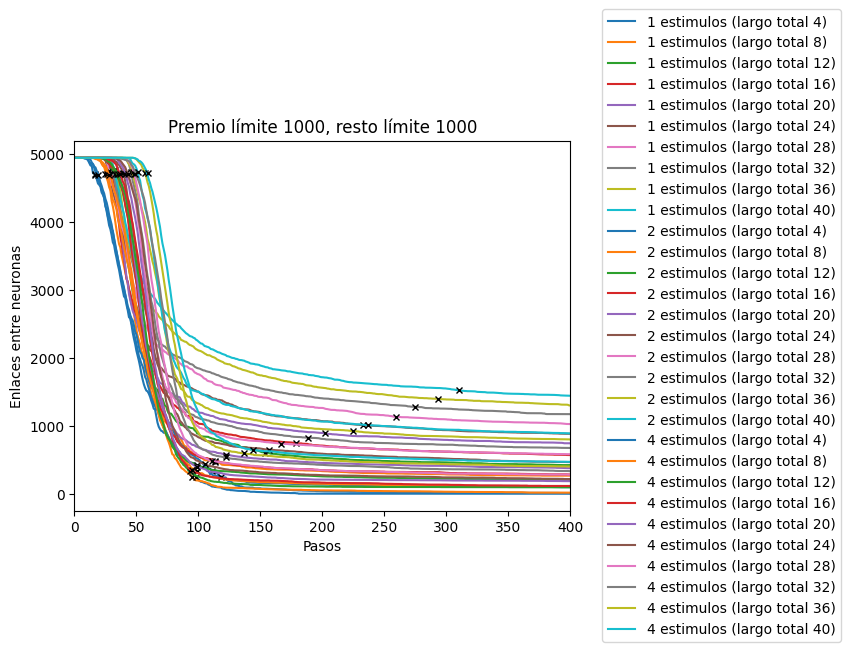

In [26]:
dicc_tau_medio={}
dicc_tau_95 = {}
dicc_tau_05 = {}
lista_grados = []

#Gráfico para distintos estimulos
for cantidad_estim in [1, 2, 4]:
    for largo_estim in [4, 8, 12, 16, 20, 24, 28, 32, 36, 40]:
        nucleo, coclea = fMBA.iniciar_red(n_neu, peso_inicial)
        lista_vertices = fMBA.entrenar_peso_limite_resto(nucleo, coclea, largo_estim, cantidad_estim, pasos, peso_total, resto_total)

        dicc_tau_95[(cantidad_estim, largo_estim)] = fMBA.x_tau_porcentaje(lista_vertices, 95)[0]
        dicc_tau_05[(cantidad_estim, largo_estim)] = fMBA.x_tau_porcentaje(lista_vertices, 5)[0]
        dicc_tau_medio[(cantidad_estim, largo_estim)] = fMBA.x_tau_medio(lista_vertices)[0]

        lista_grados.append(list(dict(nucleo.degree()).values()))
        plt.plot(lista_vertices, label=f'{cantidad_estim} estimulos (largo total {largo_estim})')
        plt.plot(dicc_tau_95[(cantidad_estim, largo_estim)], fMBA.x_tau_porcentaje(lista_vertices, 95)[1], marker='x', markersize=4, color='black')
        plt.plot(dicc_tau_05[(cantidad_estim, largo_estim)], fMBA.x_tau_porcentaje(lista_vertices, 5)[1], marker='x', markersize=4, color='black')

        plt.xlim(0, 400) #lo acorté visualmente para poder diferenciar mejor algunas cosas pero la cantidad de pasos no cambia
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.xlabel ("Pasos")
plt.ylabel("Enlaces entre neuronas")
plt.title ("Premio límite 1000, resto límite 1000")
plt.show()

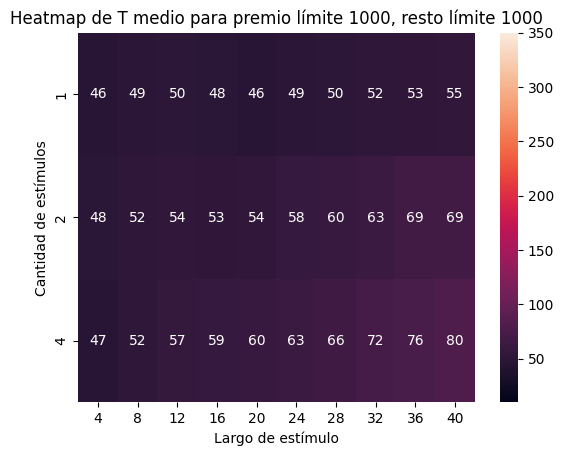

In [27]:
# Crear un DataFrame a partir del diccionario tau medio
df_hm = pd.DataFrame.from_dict(dicc_tau_medio, orient='index', columns=['Value'])
df_hm.index = pd.MultiIndex.from_tuples(df_hm.index, names=["Row", "Column"])
df_hm = df_hm.unstack(level='Column')

# Visualizar el DataFrame resultante
df_hm.columns = df_hm.columns.droplevel(0)  # Eliminar niveles innecesarios
df_hm = df_hm.rename_axis(index=None, columns=None)  # Eliminar nombres de los ejes

df_hm

hm = sns.heatmap(df_hm, annot=True, fmt="g", vmax= 350, vmin=10)
hm.set(xlabel='Largo de estímulo', ylabel='Cantidad de estímulos', title = "Heatmap de T medio para premio límite 1000, resto límite 1000")
plt.show()

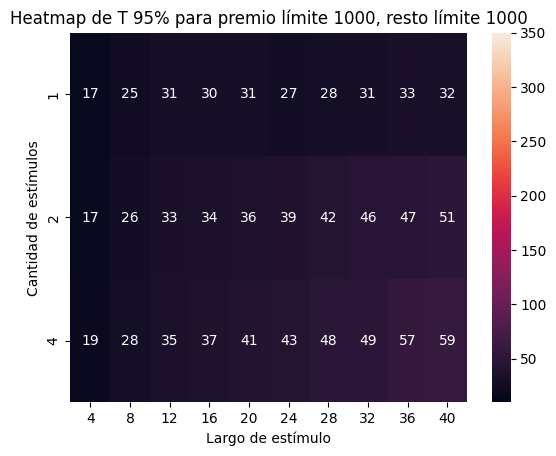

In [28]:
# Crear un DataFrame a partir del diccionario tau 95
df_hm = pd.DataFrame.from_dict(dicc_tau_95, orient='index', columns=['Value'])
df_hm.index = pd.MultiIndex.from_tuples(df_hm.index, names=["Row", "Column"])
df_hm = df_hm.unstack(level='Column')

# Visualizar el DataFrame resultante
df_hm.columns = df_hm.columns.droplevel(0)  # Eliminar niveles innecesarios
df_hm = df_hm.rename_axis(index=None, columns=None)  # Eliminar nombres de los ejes

df_hm

hm = sns.heatmap(df_hm, annot=True, fmt="g", vmax= 350, vmin=10)
hm.set(xlabel='Largo de estímulo', ylabel='Cantidad de estímulos', title = "Heatmap de T 95% para premio límite 1000, resto límite 1000")
plt.show()


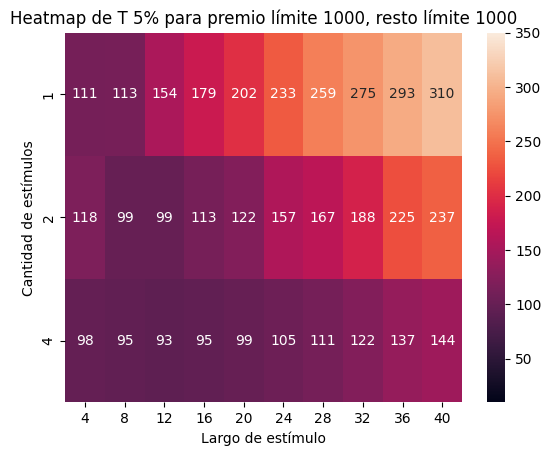

In [29]:
# Crear un DataFrame a partir del diccionario tau 05
df_hm = pd.DataFrame.from_dict(dicc_tau_05, orient='index', columns=['Value'])
df_hm.index = pd.MultiIndex.from_tuples(df_hm.index, names=["Row", "Column"])
df_hm = df_hm.unstack(level='Column')

# Visualizar el DataFrame resultante
df_hm.columns = df_hm.columns.droplevel(0)  # Eliminar niveles innecesarios
df_hm = df_hm.rename_axis(index=None, columns=None)  # Eliminar nombres de los ejes

df_hm

hm = sns.heatmap(df_hm, annot=True, fmt="g", vmax= 350, vmin=10)
hm.set(xlabel='Largo de estímulo', ylabel='Cantidad de estímulos', title = "Heatmap de T 5% para premio límite 1000, resto límite 1000")
plt.show()

In [ ]:
#Boxplot

plt.figure(figsize=(10, 6))
df_bp = pd.DataFrame(data=list(zip(*lista_grados)), columns=dicc_tau_medio.keys())
#boxplot without outliers
sns.boxplot(data=df_bp)
plt.xlabel('Largo estímulo')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Grado')
plt.show()

Text(0.5, 1.0, 'Boxplot premio límite 1000, resto límite 1000')

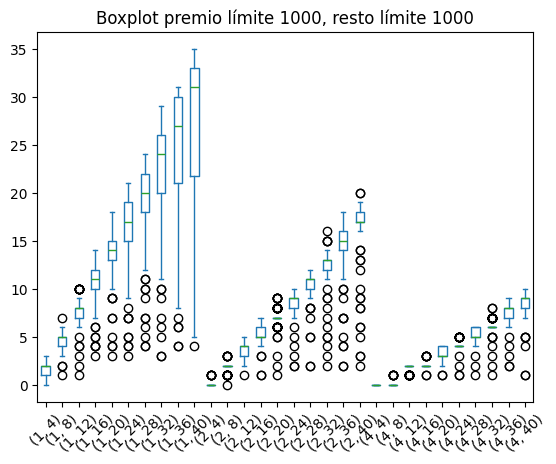

In [30]:
df_bp = pd.DataFrame(data=list(zip(*lista_grados)), columns=dicc_tau_medio.keys())
df_bp.plot.box(rot=45)
plt.title ("Boxplot premio límite 1000, resto límite 1000")

### Gráficos premio límite 1000, resto límite 200

In [31]:
#Parámetros
n_neu = 100
pasos = 1000
peso_inicial = 10
peso_total = 1000
resto_total = 200

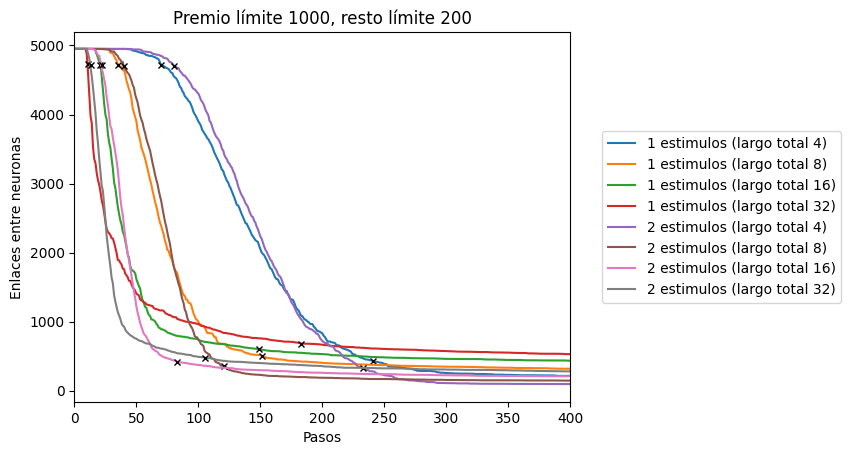

In [32]:
dicc_tau_medio={}
dicc_tau_95 = {}
dicc_tau_05 = {}
lista_grados = []

#Gráfico para distintos estimulos
for cantidad_estim in [1, 2]:
    for largo_estim in [4, 8, 16, 32]:
        nucleo, coclea = fMBA.iniciar_red(n_neu, peso_inicial)
        lista_vertices = fMBA.entrenar_peso_limite(nucleo, coclea, largo_estim, cantidad_estim, pasos, peso_total)

        dicc_tau_95[(cantidad_estim, largo_estim)] = fMBA.x_tau_porcentaje(lista_vertices, 95)[0]
        dicc_tau_05[(cantidad_estim, largo_estim)] = fMBA.x_tau_porcentaje(lista_vertices, 5)[0]
        dicc_tau_medio[(cantidad_estim, largo_estim)] = fMBA.x_tau_medio(lista_vertices)[0]

        lista_grados.append(list(dict(nucleo.degree()).values()))
        plt.plot(lista_vertices, label=f'{cantidad_estim} estimulos (largo total {largo_estim})')
        plt.plot(dicc_tau_95[(cantidad_estim, largo_estim)], fMBA.x_tau_porcentaje(lista_vertices, 95)[1], marker='x', markersize=4, color='black')
        plt.plot(dicc_tau_05[(cantidad_estim, largo_estim)], fMBA.x_tau_porcentaje(lista_vertices, 5)[1], marker='x', markersize=4, color='black')

        plt.xlim(0, 400) #lo acorté visualmente para poder diferenciar mejor algunas cosas pero la cantidad de pasos no cambia
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.xlabel ("Pasos")
plt.ylabel("Enlaces entre neuronas")
plt.title ("Premio límite 1000, resto límite 200")
plt.show()

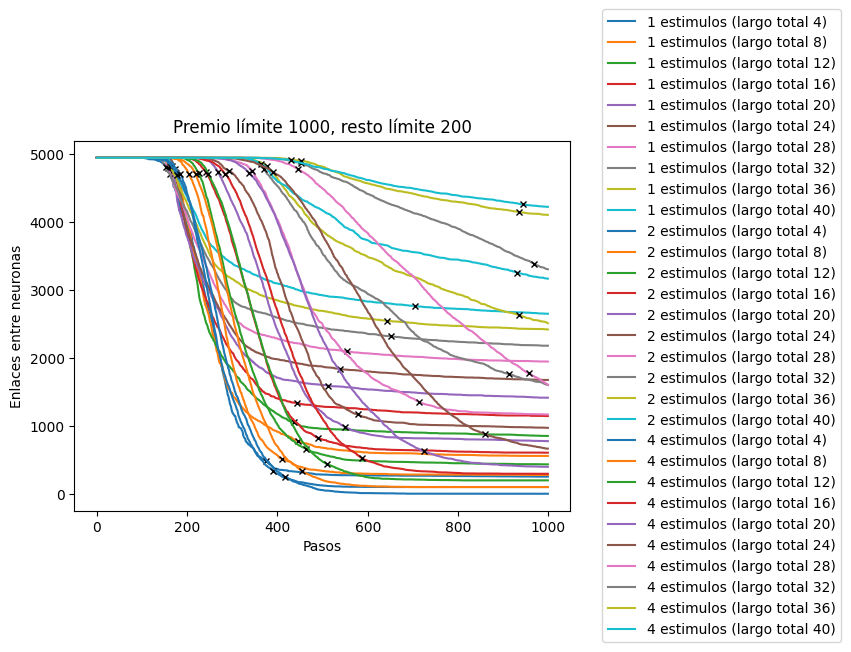

In [33]:
dicc_tau_medio={}
dicc_tau_95 = {}
dicc_tau_05 = {}
lista_grados = []

#Gráfico para distintos estimulos
for cantidad_estim in [1, 2, 4]:
    for largo_estim in [4, 8, 12, 16, 20, 24, 28, 32, 36, 40]:
        nucleo, coclea = fMBA.iniciar_red(n_neu, peso_inicial)
        lista_vertices = fMBA.entrenar_peso_limite_resto(nucleo, coclea, largo_estim, cantidad_estim, pasos, peso_total, resto_total)

        dicc_tau_95[(cantidad_estim, largo_estim)] = fMBA.x_tau_porcentaje(lista_vertices, 95)[0]
        dicc_tau_05[(cantidad_estim, largo_estim)] = fMBA.x_tau_porcentaje(lista_vertices, 5)[0]
        dicc_tau_medio[(cantidad_estim, largo_estim)] = fMBA.x_tau_medio(lista_vertices)[0]

        lista_grados.append(list(dict(nucleo.degree()).values()))
        plt.plot(lista_vertices, label=f'{cantidad_estim} estimulos (largo total {largo_estim})')
        plt.plot(dicc_tau_95[(cantidad_estim, largo_estim)], fMBA.x_tau_porcentaje(lista_vertices, 95)[1], marker='x', markersize=4, color='black')
        plt.plot(dicc_tau_05[(cantidad_estim, largo_estim)], fMBA.x_tau_porcentaje(lista_vertices, 5)[1], marker='x', markersize=4, color='black')

        #plt.xlim(0, 400) #lo acorté visualmente para poder diferenciar mejor algunas cosas pero la cantidad de pasos no cambia
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.xlabel ("Pasos")
plt.ylabel("Enlaces entre neuronas")
plt.title ("Premio límite 1000, resto límite 200")
plt.show()

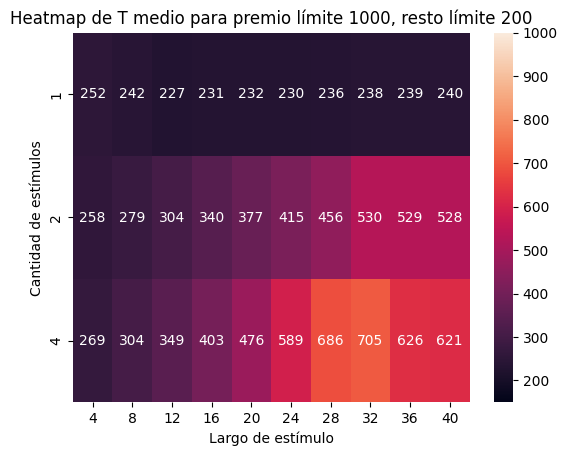

In [34]:
# Crear un DataFrame a partir del diccionario tau medio
df_hm = pd.DataFrame.from_dict(dicc_tau_medio, orient='index', columns=['Value'])
df_hm.index = pd.MultiIndex.from_tuples(df_hm.index, names=["Row", "Column"])
df_hm = df_hm.unstack(level='Column')

# Visualizar el DataFrame resultante
df_hm.columns = df_hm.columns.droplevel(0)  # Eliminar niveles innecesarios
df_hm = df_hm.rename_axis(index=None, columns=None)  # Eliminar nombres de los ejes

df_hm

hm = sns.heatmap(df_hm, annot=True, fmt="g", vmax= 1000, vmin=150)
hm.set(xlabel='Largo de estímulo', ylabel='Cantidad de estímulos', title = "Heatmap de T medio para premio límite 1000, resto límite 200")
plt.show()

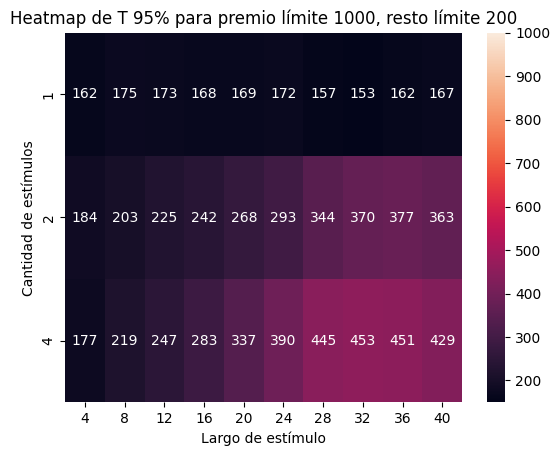

In [35]:
# Crear un DataFrame a partir del diccionario tau 95
df_hm = pd.DataFrame.from_dict(dicc_tau_95, orient='index', columns=['Value'])
df_hm.index = pd.MultiIndex.from_tuples(df_hm.index, names=["Row", "Column"])
df_hm = df_hm.unstack(level='Column')

# Visualizar el DataFrame resultante
df_hm.columns = df_hm.columns.droplevel(0)  # Eliminar niveles innecesarios
df_hm = df_hm.rename_axis(index=None, columns=None)  # Eliminar nombres de los ejes

df_hm

hm = sns.heatmap(df_hm, annot=True, fmt="g", vmax= 1000, vmin=150)
hm.set(xlabel='Largo de estímulo', ylabel='Cantidad de estímulos', title = "Heatmap de T 95% para premio límite 1000, resto límite 200")
plt.show()


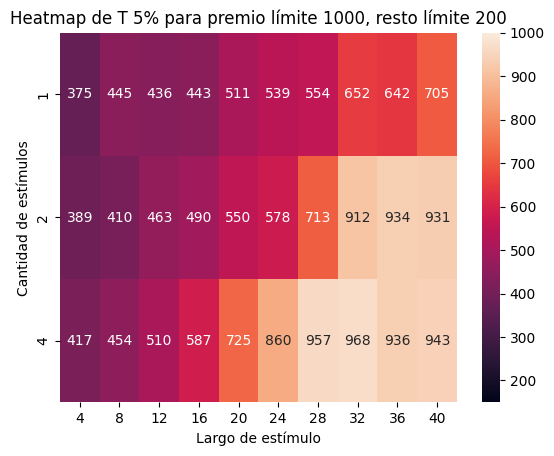

In [36]:
# Crear un DataFrame a partir del diccionario tau 05
df_hm = pd.DataFrame.from_dict(dicc_tau_05, orient='index', columns=['Value'])
df_hm.index = pd.MultiIndex.from_tuples(df_hm.index, names=["Row", "Column"])
df_hm = df_hm.unstack(level='Column')

# Visualizar el DataFrame resultante
df_hm.columns = df_hm.columns.droplevel(0)  # Eliminar niveles innecesarios
df_hm = df_hm.rename_axis(index=None, columns=None)  # Eliminar nombres de los ejes

df_hm

hm = sns.heatmap(df_hm, annot=True, fmt="g", vmax= 1000, vmin=150)
hm.set(xlabel='Largo de estímulo', ylabel='Cantidad de estímulos', title = "Heatmap de T 5% para premio límite 1000, resto límite 200")
plt.show()

In [ ]:
#Boxplot

plt.figure(figsize=(10, 6))
df_bp = pd.DataFrame(data=list(zip(*lista_grados)), columns=dicc_tau_medio.keys())
#boxplot without outliers
sns.boxplot(data=df_bp)
plt.xlabel('Largo estímulo')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Grado')
plt.show()

Text(0.5, 1.0, 'Boxplot premio límite 1000, resto límite 500')

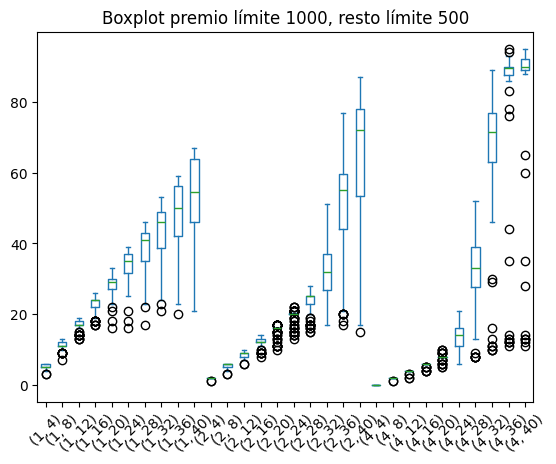

In [37]:
df_bp = pd.DataFrame(data=list(zip(*lista_grados)), columns=dicc_tau_medio.keys())
df_bp.plot.box(rot=45)
plt.title ("Boxplot premio límite 1000, resto límite 500")